# Project descripion

In this competition, Zillow is asking me to predict the log-error between their Zestimate and the actual sale price, given all the features of a home.

# Explanatory Data Analysis

### load data sets

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_2016 = pd.read_csv('./zillow-prize-1/train_2016_v2.csv')
properties_2016 = pd.read_csv('./zillow-prize-1/properties_2016.csv')
train_2017 = pd.read_csv('./zillow-prize-1/train_2017.csv')
properties_2017 = pd.read_csv('./zillow-prize-1/properties_2017.csv')

C:\TEXTBOOK\Python\anoconda\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\TEXTBOOK\Python\anoconda\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### shape of data sets

In [4]:
print ("Shape Of Train_2016: ",train_2016.shape)
print("columns in Train_2016", train_2016.columns)
print ("Shape Of Properties_2016: ",properties_2016.shape)
print("columns in Properties_2016", properties_2016.columns)
print ("Shape Of Train_2017: ",train_2017.shape)
print("columns in Train_2017", train_2017.columns)
print ("Shape Of Properties_2017: ",properties_2017.shape)
print("columns in Properties_2017", properties_2017.columns)

Shape Of Train_2016:  (90275, 3)
columns in Train_2016 Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')
Shape Of Properties_2016:  (2985217, 58)
columns in Properties_2016 Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       '

### merge two data sets

In [3]:
merged_data_2016 = pd.merge(train_2016, properties_2016, on = 'parcelid', how = 'left')
print("the shape of merged_data_2016 is: ", merged_data_2016.shape)
merged_data_2017 = pd.merge(train_2017, properties_2017, on = 'parcelid', how = 'left')
print("the shape of merged_data_2017 is: ", merged_data_2017.shape)

the shape of merged_data_2016 is:  (90275, 60)
the shape of merged_data_2017 is:  (77613, 60)


In [6]:
merged_data_2016.head(3)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13


In [7]:
merged_data_2017.head(3)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,2017-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,17052889,0.055619,2017-01-01,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,14186244,0.005383,2017-01-01,NaN,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13


In [4]:
merged_data = merged_data_2016.append(merged_data_2017)

In [96]:
merged_data.shape

(167888, 60)

In [97]:
merged_data.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


### data types

In [98]:
merged_dtype = pd.DataFrame(merged_data.dtypes.value_counts()).reset_index()

In [99]:
merged_dtype.head()

,index,0
0,float64,53
1,object,6
2,int64,1


## Missing value and outlier analysis 

In [100]:
missing_df = merged_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_percentage'] = missing_df['missing_count']/merged_data.shape[0]
missing_df = missing_df[missing_df['missing_count'] >= 0]
missing_df = missing_df.sort_values(by = 'missing_percentage')

In [101]:
missing_df.shape

(60, 3)

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Number of missing value in each column')

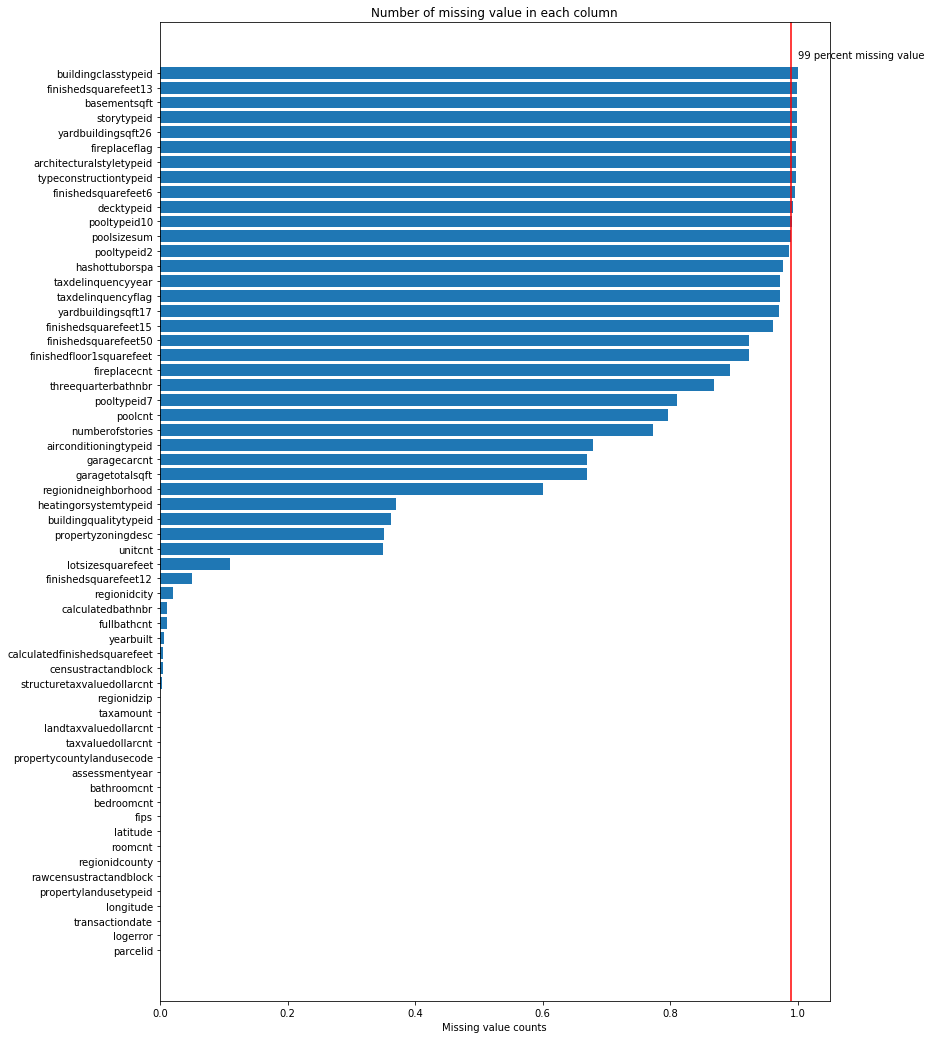

In [103]:
fig, ax = plt.subplots(figsize=(12,18))
ax.barh(missing_df.column_name, missing_df.missing_percentage)
ax.axvline(x = 0.99, color = 'red')
plt.annotate('99 percent missing value', xy=(1, missing_df.shape[0]), color='black')
plt.xlabel('Missing value counts')
plt.title('Number of missing value in each column')

### More than 99 percent missing value 

In [104]:
# analysis columns with more than 99 percent missing value
most_missing_columns = missing_df[missing_df['missing_percentage'] >= 0.99]

In [105]:
miss_99_data = merged_data[most_missing_columns.column_name.values].head()

In [106]:
miss_99_data.describe(exclude=['bool'])

,pooltypeid10,decktypeid,finishedsquarefeet6,typeconstructiontypeid,architecturalstyletypeid,fireplaceflag,yardbuildingsqft26,storytypeid,basementsqft,finishedsquarefeet13,buildingclasstypeid
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
most_missing_columns.column_name.values

array(['pooltypeid10', 'decktypeid', 'finishedsquarefeet6',
       'typeconstructiontypeid', 'architecturalstyletypeid',
       'fireplaceflag', 'yardbuildingsqft26', 'storytypeid',
       'basementsqft', 'finishedsquarefeet13', 'buildingclasstypeid'],
      dtype=object)

In [107]:
# Delete these columns
merged_data1 = merged_data.drop(most_missing_columns.column_name.values, axis = 1)

### 40 to 99 percent missing value 

In [108]:
# analysis  columns with percentage of  missing value between 40-99
many_missing_columns = missing_df[(missing_df['missing_percentage'] >= 0.4) & (missing_df['missing_percentage'] < 0.99)]

In [109]:
# the number of features having 40% to 99% percent missing value
many_missing_columns.shape

(18, 3)

In [110]:
many_missing_columns

,column_name,missing_count,missing_percentage
40,regionidneighborhood,100902,0.601008
23,garagetotalsqft,112431,0.669679
22,garagecarcnt,112431,0.669679
3,airconditioningtypeid,114100,0.679620
50,numberofstories,129719,0.772652
29,poolcnt,133813,0.797037
33,pooltypeid7,136112,0.810731
44,threequarterbathnbr,145773,0.868275
20,fireplacecnt,149992,0.893405
12,finishedfloor1squarefeet,154995,0.923205


In [111]:
miss_40_99_data = merged_data1[many_missing_columns.column_name.values]

In [112]:
# rearrange
miss_40_99_data = miss_40_99_data.reindex(sorted(miss_40_99_data.columns), axis=1)

In [113]:
miss_40_99_data.head()

,airconditioningtypeid,finishedfloor1squarefeet,finishedsquarefeet15,finishedsquarefeet50,fireplacecnt,garagecarcnt,garagetotalsqft,hashottuborspa,numberofstories,poolcnt,poolsizesum,pooltypeid2,pooltypeid7,regionidneighborhood,taxdelinquencyflag,taxdelinquencyyear,threequarterbathnbr,yardbuildingsqft17
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31817.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2.0,468.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275411.0,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54300.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,2.0,598.0,NaN,2.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN


In [114]:
miss_40_99_data.count()

airconditioningtypeid       53788
finishedfloor1squarefeet    12893
finishedsquarefeet15         6591
finishedsquarefeet50        12893
fireplacecnt                17896
garagecarcnt                55457
garagetotalsqft             55457
hashottuborspa               3904
numberofstories             38169
poolcnt                     34075
poolsizesum                  1838
pooltypeid2                  2278
pooltypeid7                 31776
regionidneighborhood        66986
taxdelinquencyflag           4683
taxdelinquencyyear           4683
threequarterbathnbr         22115
yardbuildingsqft17           5039
dtype: int64

In [115]:
miss_40_99_data.describe([.25, .5, .75, .90])

,airconditioningtypeid,finishedfloor1squarefeet,finishedsquarefeet15,finishedsquarefeet50,fireplacecnt,garagecarcnt,garagetotalsqft,numberofstories,poolcnt,poolsizesum,pooltypeid2,pooltypeid7,regionidneighborhood,taxdelinquencyyear,threequarterbathnbr,yardbuildingsqft17
count,53788.000000,12893.000000,6591.000000,12893.000000,17896.000000,55457.000000,55457.000000,38169.000000,34075.0,1838.000000,2278.0,31776.0,66986.000000,4683.000000,22115.000000,5039.000000
mean,1.814345,1356.491895,2368.333485,1367.647018,1.189428,1.813513,347.603909,1.437764,1.0,518.930903,1.0,1.0,189295.685382,13.827247,1.009134,307.919032
std,2.970239,661.068564,1124.302411,698.669027,0.487327,0.599447,264.565618,0.544508,0.0,155.732980,0.0,0.0,165687.734522,2.421658,0.109294,227.430960
min,1.000000,44.000000,560.000000,44.000000,1.000000,0.000000,0.000000,1.000000,1.0,24.000000,1.0,1.0,6952.000000,3.000000,1.000000,11.000000
25%,1.000000,945.000000,1634.000000,945.000000,1.000000,2.000000,0.000000,1.000000,1.0,420.000000,1.0,1.0,46736.000000,13.000000,1.000000,175.000000
50%,1.000000,1252.000000,2099.000000,1252.000000,1.000000,2.000000,434.000000,1.000000,1.0,500.000000,1.0,1.0,118872.000000,14.000000,1.000000,252.000000
75%,1.000000,1615.000000,2845.000000,1619.000000,1.000000,2.000000,488.000000,2.000000,1.0,600.000000,1.0,1.0,274765.000000,15.000000,1.000000,375.000000
90%,1.000000,2075.000000,3757.000000,2085.000000,2.000000,2.000000,630.000000,2.000000,1.0,720.000000,1.0,1.0,403142.000000,15.000000,1.000000,548.000000
max,13.000000,7625.000000,35640.000000,12467.000000,5.000000,24.000000,7339.000000,6.000000,1.0,1750.000000,1.0,1.0,764167.000000,99.000000,7.000000,3191.000000


#### For feature airconditioningtypeid, we can see at least 90% of its' value is 1, I decide to convert 1 to 'Normal', larger than 1 to 'More', NaN to 'None'. 

In [116]:
merged_data1['airconditioningtypeid'].fillna(value = 0, inplace = True)
merged_data1['new_airconditioningtypeid'] = pd.cut(merged_data1['airconditioningtypeid'],bins=[0,1,2, max(merged_data1['airconditioningtypeid']) + 1], right = False, include_lowest = True,labels=['None', 'Normal', 'More'])
merged_data1 = merged_data1.drop('airconditioningtypeid', axis = 1)

In [117]:
merged_data1['new_airconditioningtypeid'] = merged_data1['new_airconditioningtypeid'].astype('category')

In [118]:
merged_data1['new_airconditioningtypeid'].describe()

count     167888
unique         3
top         None
freq      114100
Name: new_airconditioningtypeid, dtype: object

#### For feature regionidneighborhood, I decide to delete it and use zip code to represent geographic information         

In [119]:
merged_data1 = merged_data1.drop('regionidneighborhood', axis = 1)

#### For finishedfloor1squarefeet, finishedsquarefeet15, finishedsquarefeet50, they all represent the size of some areas.These features can be important. Without more information, I decide to impute nan by mean

In [120]:
features = ['finishedfloor1squarefeet', 'finishedsquarefeet15', 'finishedsquarefeet50']
for f in features:
    merged_data1[f].fillna(value = merged_data1[f].mean(), inplace = True)
    print (merged_data1[f].isnull().sum())

0
0
0


#### For fireplacecnt, garagecarcnt,  garagetotalsqft. it's reasonable to assume nan means 0 . replace nan by 0. The maximum and minimum number in these 3 features seem reasonable. There's no need to remove any value.

In [121]:
features = ['fireplacecnt', 'garagecarcnt', 'garagetotalsqft']
for f in features:
    merged_data1[f].fillna(value = 0, inplace = True)
    print (merged_data1[f].isnull().sum())

0
0
0


#### For hashottuborspa feature, nan means no hot tubor or spa.

In [122]:
merged_data1['hashottuborspa'].fillna(value = 0, inplace = True)
merged_data1['hashottuborspa'] = merged_data1['hashottuborspa'].astype('category')

#### For numberofstories, use 0 to replace nan

In [123]:
merged_data1['numberofstories'].fillna(value = 0, inplace = True)

#### poolcnt, poolsizesum, pooltypeid10, pooltypeid2, pooltypeid7 are features related to pool. Replacing nan by 0 makes sense. The maximum and minimum numbers are also reasonable.

In [124]:
features = ['poolcnt', 'poolsizesum', 'pooltypeid2', 'pooltypeid7']
for f in features:
    merged_data1[f].fillna(value = 0, inplace = True)
    print (merged_data1[f].isnull().sum())

0
0
0
0


#### For taxdelinquencyyear, replace nan by 0. Maximum number is 99 which is meaningless. replace taxdelinquencyyear which is greater than 90 percentile by 90 percentile. For taxdelinquencyflag , replace nan by 0 and change it to category

In [125]:
merged_data1['taxdelinquencyyear'].fillna(value = 0, inplace = True)
merged_data1['taxdelinquencyyear'].apply(lambda x: 15 if x > 15 else x)
merged_data1['taxdelinquencyflag'].fillna(value = 'N', inplace = True).astype('category')

#### For threequarterbathnbr and yardbuildingsqft17, Replacing nan by 0 makes sense. The maximum and minimum numbers are also reasonable.

In [126]:
features = ['threequarterbathnbr', 'yardbuildingsqft17']
for f in features:
    merged_data1[f].fillna(value = 0, inplace = True)
    print (merged_data1[f].isnull().sum())

0
0


### 5 to 40 percent missing value 

In [127]:
# analysis  columns with percentage of  missing value between 5-40
few_missing_columns = missing_df[(missing_df['missing_percentage'] >= 0.05) & (missing_df['missing_percentage'] < 0.4)]

In [128]:
miss_40_99_data = merged_data1[few_missing_columns.column_name.values]
miss_40_99_data.describe([.25, .5, .75, .90, .99])

,lotsizesquarefeet,unitcnt,buildingqualitytypeid,heatingorsystemtypeid
count,1.494460e+05,109056.000000,107173.000000,105651.000000
mean,2.951060e+04,1.110365,6.015461,3.924525
std,1.224588e+05,0.988168,1.882799,3.642599
min,1.670000e+02,1.000000,1.000000,1.000000
25%,5.702000e+03,1.000000,4.000000,2.000000
50%,7.200000e+03,1.000000,7.000000,2.000000
75%,1.174675e+04,1.000000,7.000000,7.000000
90%,4.660900e+04,1.000000,8.000000,7.000000
99%,4.629100e+05,4.000000,11.000000,24.000000
max,6.971010e+06,237.000000,12.000000,24.000000


In [129]:
miss_40_99_data.head()

,lotsizesquarefeet,unitcnt,propertyzoningdesc,buildingqualitytypeid,heatingorsystemtypeid
0,7528.0,1.0,LARS,4.0,2.0
1,3643.0,NaN,NaN,NaN,NaN
2,11423.0,1.0,PSR6,4.0,2.0
3,70859.0,1.0,LAR3,4.0,2.0
4,6000.0,NaN,NaN,NaN,NaN


#### For propertyzoningdesc, it's a feature with 1997 levels and it's hard to figure out the meaning, I decide to delete this feature

In [130]:
merged_data1 = merged_data1.drop('propertyzoningdesc', axis = 1)

In [131]:
features = ['finishedsquarefeet12', 'lotsizesquarefeet']
for f in features:
    merged_data1[f].fillna(value = 0, inplace = True)
    print (merged_data1[f].isnull().sum())

0
0


#### For unitcnt,  use mode to impute missing value, Maximum 143 is meaning less, using 99.5% percentile to replace it.

In [132]:
merged_data1['unitcnt'].fillna(value = merged_data1['unitcnt'].mode().values[0], inplace = True)
merged_data1['unitcnt'] = merged_data1['unitcnt'].apply(lambda x: 4 if x > 4 else x)
merged_data1['unitcnt'] = merged_data1['unitcnt'].astype('category')

In [133]:
merged_data1['unitcnt'].describe()

count     167888.0
unique         4.0
top            1.0
freq      160748.0
Name: unitcnt, dtype: float64

#### For buildingqualitytypeid,  use mode to impute missing value

In [134]:
merged_data1['buildingqualitytypeid'].fillna(value = merged_data1['buildingqualitytypeid'].mode().values[0], inplace = True)

#### For feature heatingorsystemtypeid,  I decide to convert 1-2 to 'Normal',  3-7 to 'excellenct', greater than 7 to 'extreme', NaN to 'None'

In [135]:
merged_data1['heatingorsystemtypeid'].fillna(value = 0, inplace = True)
merged_data1['new_heatingorsystemtypeid'] = pd.cut(merged_data1['heatingorsystemtypeid'],bins=[0,1,3 ,7, max(merged_data1['heatingorsystemtypeid']) + 1], right = False, include_lowest = True,labels=['None', 'Normal', 'Excellenct', 'extreme'])
merged_data1['new_heatingorsystemtypeid'] = merged_data1['new_heatingorsystemtypeid'].astype('category')
merged_data1 = merged_data1.drop('heatingorsystemtypeid', axis = 1)

### 0 to 5 percent missing value 

In [136]:
missing_0_5_columns = missing_df[(missing_df['missing_percentage'] < 0.05) & (missing_df['missing_percentage'] > 0)]

In [137]:
missing_0_5_columns

,column_name,missing_count,missing_percentage
27,longitude,34,0.000203
35,propertylandusetypeid,34,0.000203
37,rawcensustractandblock,34,0.000203
39,regionidcounty,34,0.000203
42,roomcnt,34,0.000203
26,latitude,34,0.000203
19,fips,34,0.000203
7,bedroomcnt,34,0.000203
6,bathroomcnt,34,0.000203
54,assessmentyear,34,0.000203


In [138]:
miss_0_5_data = merged_data1[missing_0_5_columns.column_name.values]
miss_0_5_data = miss_0_5_data.reindex(sorted(miss_0_5_data.columns), axis=1)
miss_0_5_data.describe([.25, .5, .75, .90, .99])

,assessmentyear,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,censustractandblock,finishedsquarefeet12,fips,fullbathcnt,landtaxvaluedollarcnt,...,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxamount,taxvaluedollarcnt,yearbuilt
count,167854.000000,167854.000000,167854.000000,166056.000000,166992.000000,1.670020e+05,167888.000000,167854.000000,166056.000000,1.678510e+05,...,167854.000000,1.678540e+05,164579.000000,167854.000000,167769.000000,167854.000000,1.673590e+05,167843.000000,1.678520e+05,166828.000000
mean,2015.462181,2.288265,3.041739,2.312542,1778.630246,6.049390e+13,1664.975704,6048.844484,2.245345,2.888805e+05,...,261.828619,6.049154e+07,33725.134525,2529.623923,96586.390722,1.477480,1.843460e+05,5989.515575,4.726833e+05,1968.569311
std,0.498569,1.000835,1.149134,0.977808,940.356025,1.054137e+12,975.718884,20.702187,0.964703,4.456451e+05,...,5.163838,2.054437e+05,46922.468867,803.745176,3723.009458,2.821496,2.192841e+05,7214.731946,6.028372e+05,23.777202
min,2015.000000,0.000000,0.000000,1.000000,2.000000,6.037101e+13,0.000000,6037.000000,1.000000,2.200000e+01,...,31.000000,6.037101e+07,3491.000000,1286.000000,95982.000000,0.000000,4.400000e+01,19.920000,2.200000e+01,1824.000000
25%,2015.000000,2.000000,2.000000,2.000000,1183.000000,6.037312e+13,1120.000000,6037.000000,2.000000,8.373000e+04,...,261.000000,6.037312e+07,12447.000000,1286.000000,96193.000000,0.000000,8.256800e+04,2798.070000,2.026522e+05,1953.000000
50%,2015.000000,2.000000,3.000000,2.000000,1541.000000,6.037604e+13,1479.000000,6037.000000,2.000000,1.977760e+05,...,261.000000,6.037604e+07,25218.000000,3101.000000,96389.000000,0.000000,1.340510e+05,4501.040000,3.500000e+05,1970.000000
75%,2016.000000,3.000000,4.000000,3.000000,2103.000000,6.059042e+13,2023.000000,6059.000000,3.000000,3.553340e+05,...,266.000000,6.059042e+07,45457.000000,3101.000000,96987.000000,0.000000,2.142570e+05,6914.165000,5.540020e+05,1987.000000
90%,2016.000000,3.000000,4.000000,3.000000,2899.000000,6.059100e+13,2797.000000,6059.000000,3.000000,5.757000e+05,...,266.000000,6.059100e+07,52842.000000,3101.000000,97084.000000,7.000000,3.434970e+05,10798.880000,8.726469e+05,2001.000000
99%,2016.000000,5.500000,6.000000,5.500000,5115.090000,6.111008e+13,5016.260000,6111.000000,5.000000,1.781248e+06,...,269.000000,6.111008e+07,396054.000000,3101.000000,97329.000000,9.000000,1.000000e+06,31454.945400,2.612222e+06,2012.000000
max,2016.000000,20.000000,16.000000,20.000000,35640.000000,4.830301e+14,21929.000000,6111.000000,20.000000,4.895220e+07,...,275.000000,6.111009e+07,396556.000000,3101.000000,399675.000000,18.000000,1.142179e+07,586639.300000,4.906124e+07,2016.000000


In [139]:
miss_0_5_data.head()

,assessmentyear,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,censustractandblock,finishedsquarefeet12,fips,fullbathcnt,landtaxvaluedollarcnt,...,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,structuretaxvaluedollarcnt,taxamount,taxvaluedollarcnt,yearbuilt
0,2015.0,2.0,3.0,2.0,1684.0,6.037107e+13,1684.0,6037.0,2.0,237416.0,...,261.0,6.037107e+07,12447.0,3101.0,96370.0,0.0,122754.0,6735.88,360170.0,1959.0
1,2015.0,3.5,4.0,3.5,2263.0,NaN,2263.0,6059.0,3.0,239071.0,...,261.0,6.059052e+07,32380.0,1286.0,96962.0,0.0,346458.0,10153.02,585529.0,2014.0
2,2015.0,3.0,2.0,3.0,2217.0,6.037464e+13,2217.0,6037.0,3.0,57912.0,...,261.0,6.037464e+07,47019.0,3101.0,96293.0,0.0,61994.0,11484.48,119906.0,1940.0
3,2015.0,2.0,2.0,2.0,839.0,6.037296e+13,839.0,6037.0,2.0,73362.0,...,266.0,6.037296e+07,12447.0,3101.0,96222.0,0.0,171518.0,3048.74,244880.0,1987.0
4,2015.0,2.5,4.0,2.5,2283.0,6.059042e+13,2283.0,6059.0,2.0,264977.0,...,261.0,6.059042e+07,17686.0,1286.0,96961.0,8.0,169574.0,5488.96,434551.0,1981.0


In [140]:
merged_data1[['regionidcounty', 'regionidcity', 'regionidzip', 'propertycountylandusecode']].head()

,regionidcounty,regionidcity,regionidzip,propertycountylandusecode
0,3101.0,12447.0,96370.0,0100
1,1286.0,32380.0,96962.0,1
2,3101.0,47019.0,96293.0,0100
3,3101.0,12447.0,96222.0,010C
4,1286.0,17686.0,96961.0,122


#### Geographic informaiton includes regionidzip, regionidcity , regionidcounty and propertycountylandusecode. I decide to delete regionidcity, and use the first three digits of region zip code to represent geo information. Impete NA in 'regionidzip' by mode

In [141]:
# impute missing value
merged_data1['regionidzip'].fillna(value = merged_data1['regionidzip'].mode().values[0], inplace = True) 

In [142]:
# take first three digits of the zip code as geo information
merged_data1['regionidzip'] = merged_data1['regionidzip'].astype('str')
merged_data1['regionidzip'] = merged_data1['regionidzip'].apply(lambda x: x[:3])
merged_data1['regionidzip'] = merged_data1['regionidzip'].astype('category')

In [143]:
merged_data1['regionidzip'].describe()

count     167888
unique        13
top          969
freq       25588
Name: regionidzip, dtype: object

In [144]:
# number of unique category in regionidcity
len(merged_data1['regionidcity'].unique())

179

In [145]:
# drop regionidcity
merged_data1 = merged_data1.drop('regionidcity', axis = 1)

In [146]:
# number of unique category in regionidcity
len(merged_data1['propertycountylandusecode'].unique())

91

In [147]:
# delete propertycountylandusecode 
merged_data1 = merged_data1.drop('propertycountylandusecode', axis = 1)

####  impute the rest features by median

In [148]:
missing_0_5_columns.column_name.values

array(['longitude', 'propertylandusetypeid', 'rawcensustractandblock',
       'regionidcounty', 'roomcnt', 'latitude', 'fips', 'bedroomcnt',
       'bathroomcnt', 'assessmentyear', 'propertycountylandusecode',
       'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount',
       'regionidzip', 'structuretaxvaluedollarcnt', 'censustractandblock',
       'calculatedfinishedsquarefeet', 'yearbuilt', 'fullbathcnt',
       'calculatedbathnbr', 'regionidcity', 'finishedsquarefeet12'],
      dtype=object)

In [149]:
## Impute NA by medians
features = ['taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'structuretaxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'calculatedfinishedsquarefeet','yearbuilt']
for f in features:
    merged_data1[f].fillna(value = merged_data1[f].median(), inplace = True)
    print (merged_data1[f].isnull().sum())

0
0
0
0
0
0
0


In [150]:
## impute NA by 0
features = ['fullbathcnt', 'calculatedbathnbr']
for f in features:
    merged_data1[f].fillna(value = 0, inplace = True)
    print (merged_data1[f].isnull().sum())

0
0


In [151]:
## drop censustractandblock.
merged_data1 = merged_data1.drop('censustractandblock', axis = 1)

In [152]:
## delete rows having NA in longitude and latitude
merged_data1.dropna(inplace = True)

#### check NA for the whole data set again

In [153]:
merged_data1.isnull().sum(axis = 0).sum()

0

#### check features don't have NA

In [154]:
missing_0_columns = missing_df[missing_df['missing_percentage'] == 0]

In [155]:
missing_0_columns

,column_name,missing_count,missing_percentage
0,parcelid,0,0.0
1,logerror,0,0.0
2,transactiondate,0,0.0


In [156]:
# change propertylandusetypeid to category
merged_data1['propertylandusetypeid'] = merged_data1['propertylandusetypeid'].astype('category')

In [157]:
# change regionidcounty to category
merged_data1['regionidcounty'] = merged_data1['regionidcounty'].astype('category')

In [158]:
# change assessmentyear to category
merged_data1['assessmentyear'] = merged_data1['assessmentyear'].astype('category')

In [159]:
# change fips to category
merged_data1['fips'] = merged_data1['fips'].astype('category')

#### Change transactiondate into two features: transaction_year and transaction_month. But all the transactions happend in 2016, I only keep transaction_month

In [160]:
merged_data1['transactiondate'] = merged_data1['transactiondate'].astype('str')
merged_data1['transaction_month'] = merged_data1['transactiondate'].apply(lambda x: x[5:7]).astype('category')
merged_data1['transaction_year'] = merged_data1['transactiondate'].apply(lambda x: x[0:4]).astype('category')

In [161]:
merged_data1.drop('transactiondate', axis = 1, inplace = True)

In [162]:
merged_data1.isnull().sum(axis = 0)

parcelid                        0
logerror                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
finishedfloor1squarefeet        0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
finishedsquarefeet15            0
finishedsquarefeet50            0
fips                            0
fireplacecnt                    0
fullbathcnt                     0
garagecarcnt                    0
garagetotalsqft                 0
hashottuborspa                  0
latitude                        0
longitude                       0
lotsizesquarefeet               0
poolcnt                         0
poolsizesum                     0
pooltypeid2                     0
pooltypeid7                     0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
threequarterba

In [163]:
## Since parcelid has no relation to our target, I decede to delete it
merged_data1.drop('parcelid', axis = 1, inplace = True)

In [164]:
merged_data1.shape

(167854, 44)

## Correlation Analysis

In [165]:
import seaborn as sns
color = sns.color_palette()

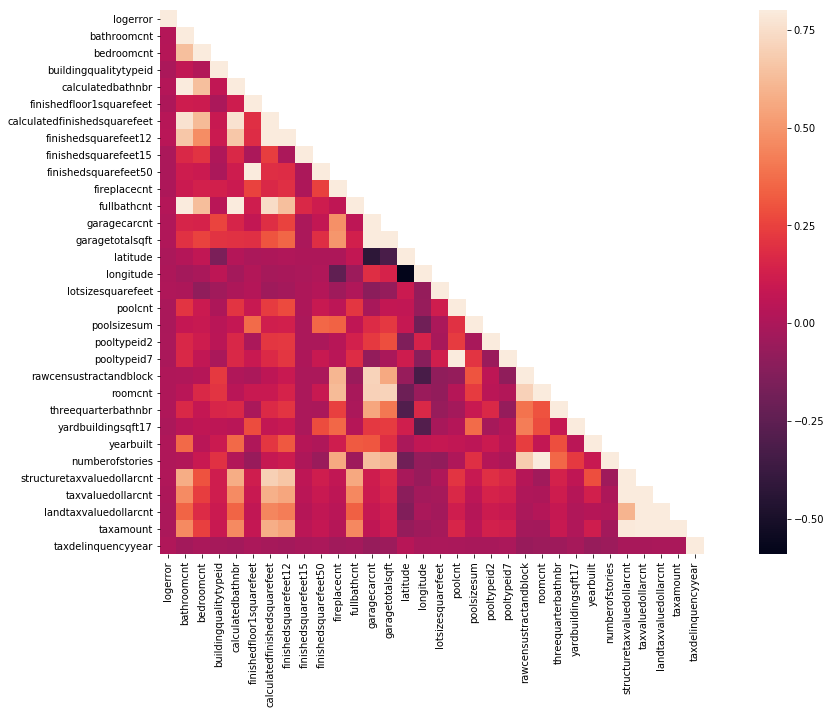

In [166]:
corr_num = merged_data1.corr()
mask = np.array(corr_num)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr_num, mask=mask,vmax=.8, square=True)

In [167]:
corr_large = corr_num.where(corr_num >= 0.95).fillna(value = 0)

In [168]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(corr_large)

,logerror,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet15,finishedsquarefeet50,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid2,pooltypeid7,rawcensustractandblock,roomcnt,threequarterbathnbr,yardbuildingsqft17,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear
logerror,1.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
bathroomcnt,0.0,1.000000,0.0,0.0,0.999303,0.00000,0.0,0.0,0.0,0.00000,0.0,0.984483,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
bedroomcnt,0.0,0.000000,1.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
buildingqualitytypeid,0.0,0.000000,0.0,1.0,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
calculatedbathnbr,0.0,0.999303,0.0,0.0,1.000000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.985169,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
finishedfloor1squarefeet,0.0,0.000000,0.0,0.0,0.000000,1.00000,0.0,0.0,0.0,0.96923,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
calculatedfinishedsquarefeet,0.0,0.000000,0.0,0.0,0.000000,0.00000,1.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
finishedsquarefeet12,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,1.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
finishedsquarefeet15,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,1.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
finishedsquarefeet50,0.0,0.000000,0.0,0.0,0.000000,0.96923,0.0,0.0,0.0,1.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


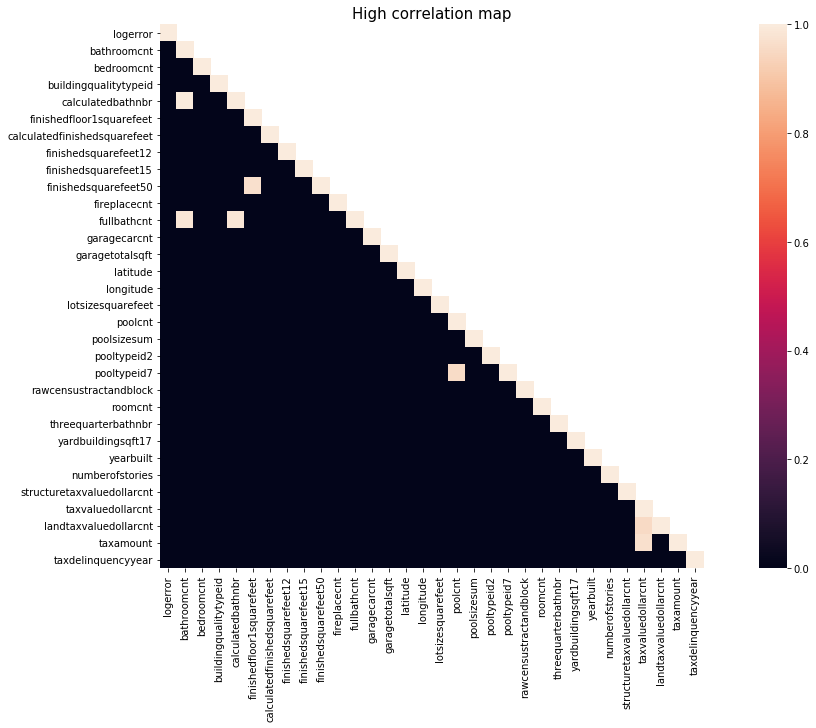

In [169]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_large,mask = mask, vmax=1., square=True)
plt.title("High correlation map", fontsize=15)
plt.show()

#### It's obvious to find that bathroomcnt, calculatedbathnbr and fullbathcnt have very high correlation. finishedfloor1squarefeet and finishedsquarefeet50 have very high correlation. pooltypeid7 and poolcnt have very high correlation. taxvaluedollarcnt and landtaxvaluedollarcnt have very high correlation. Since they all have similar meaning, delete one of them.

In [170]:
## drop features with high correlation
merged_data1.drop(['calculatedbathnbr', 'fullbathcnt', 'finishedsquarefeet50', 'pooltypeid7', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt'], axis = 1, inplace = True)

## EDA

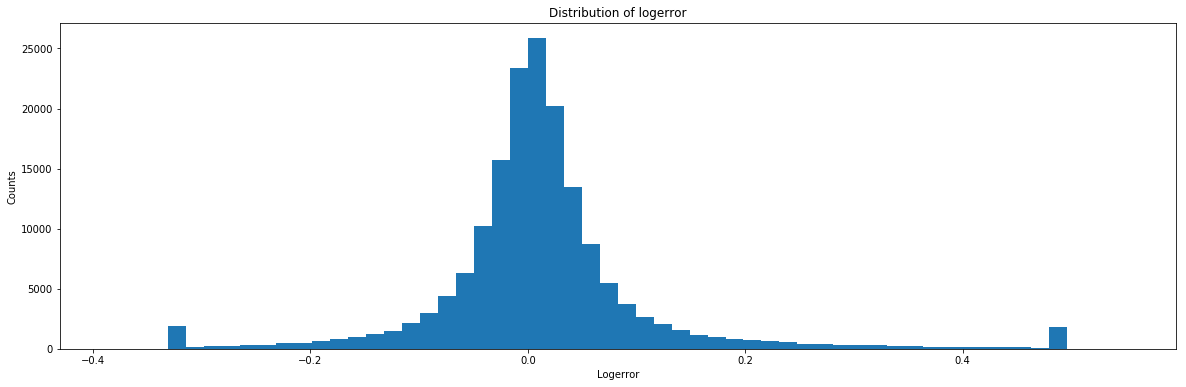

In [171]:
## The distribution of logerror

xmin = np.percentile(merged_data1.logerror.values, 1)
xmax = np.percentile(merged_data1.logerror.values, 99)
log_error = merged_data1['logerror'].copy()
log_error.loc[log_error > xmax] = xmax
log_error.loc[log_error < xmin] = xmin
count, bin_edges = np.histogram(log_error, 50)
log_error.plot(kind = 'hist', bins=50, xlim=(xmin-0.1, xmax+0.1), figsize = (20, 6))
plt.title('Distribution of logerror')
plt.ylabel('Counts')
plt.xlabel('Logerror') 

plt.show()

From the distribution, we can see that some predictions have logerror more than 0.45

In [172]:
with pd.option_context('display.max_columns', None):  # more options can be specified also
    display(merged_data1.head())

,logerror,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet15,fips,fireplacecnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid2,propertylandusetypeid,rawcensustractandblock,regionidcounty,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yearbuilt,numberofstories,structuretaxvaluedollarcnt,assessmentyear,taxamount,taxdelinquencyflag,taxdelinquencyyear,new_airconditioningtypeid,new_heatingorsystemtypeid,transaction_month,transaction_year
0,0.0276,2.0,3.0,4.0,1356.491895,1684.0,1684.0,2368.333485,6037.0,0.0,0.0,0.0,0,34280990.0,-118488536.0,7528.0,0.0,0.0,0.0,261.0,6.037107e+07,3101.0,963,0.0,0.0,1.0,0.0,1959.0,0.0,122754.0,2015.0,6735.88,N,0.0,Normal,Normal,01,2016
1,-0.1684,3.5,4.0,7.0,1356.491895,2263.0,2263.0,2368.333485,6059.0,0.0,2.0,468.0,0,33668120.0,-117677556.0,3643.0,0.0,0.0,0.0,261.0,6.059052e+07,1286.0,969,0.0,1.0,1.0,0.0,2014.0,0.0,346458.0,2015.0,10153.02,N,0.0,None,None,01,2016
2,-0.0040,3.0,2.0,4.0,1356.491895,2217.0,2217.0,2368.333485,6037.0,0.0,0.0,0.0,0,34136312.0,-118175032.0,11423.0,0.0,0.0,0.0,261.0,6.037464e+07,3101.0,962,0.0,0.0,1.0,0.0,1940.0,0.0,61994.0,2015.0,11484.48,N,0.0,Normal,Normal,01,2016
3,0.0218,2.0,2.0,4.0,1356.491895,839.0,839.0,2368.333485,6037.0,0.0,0.0,0.0,0,33755800.0,-118309000.0,70859.0,0.0,0.0,0.0,266.0,6.037296e+07,3101.0,962,0.0,0.0,1.0,0.0,1987.0,0.0,171518.0,2015.0,3048.74,N,0.0,Normal,Normal,01,2016
4,-0.0050,2.5,4.0,7.0,1356.491895,2283.0,2283.0,2368.333485,6059.0,0.0,2.0,598.0,0,33485643.0,-117700234.0,6000.0,1.0,0.0,0.0,261.0,6.059042e+07,1286.0,969,8.0,1.0,1.0,0.0,1981.0,2.0,169574.0,2015.0,5488.96,N,0.0,None,None,01,2016


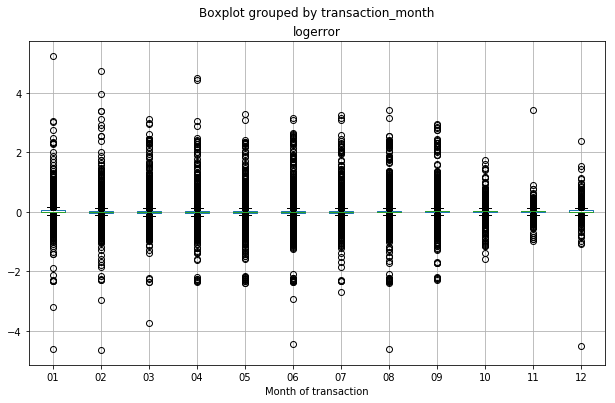

In [173]:
## Relationship between Month and logerror
merged_data1.boxplot(column = 'logerror', by = 'transaction_month', figsize = (10,6))
plt.xlabel('Month of transaction')
plt.show()

There's no obviouse pattern in the graph. It seems like month of transaction won't influence price prediction

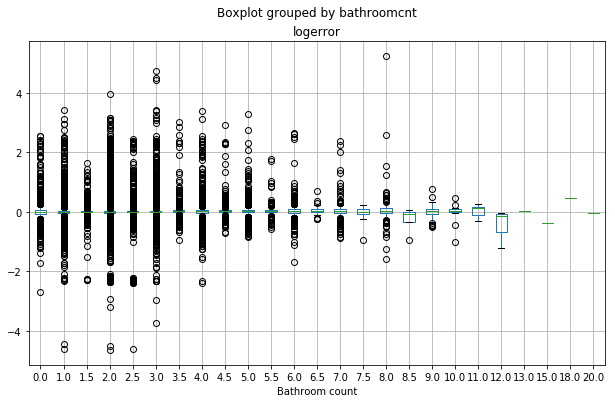

In [174]:
## Relationship between bathroomcnt and logerror
merged_data1.boxplot(column = 'logerror', by = 'bathroomcnt', figsize = (10,6))
plt.xlabel('Bathroom count')
plt.show()

When bathroom count is large, logerror is not normally ditributed

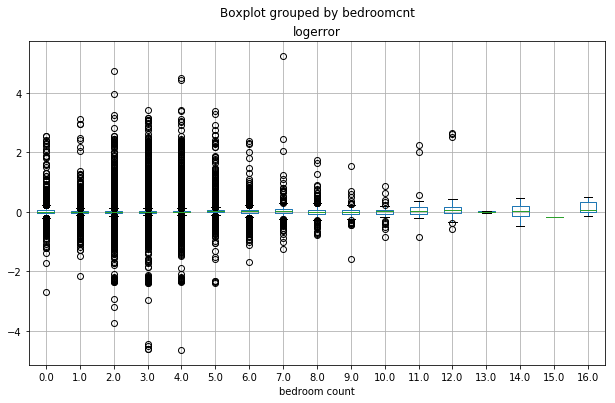

In [175]:
## Relationship between bedroomcnt and logerror
merged_data1.boxplot(column = 'logerror', by = 'bedroomcnt', figsize = (10,6))
plt.xlabel('bedroom count')
plt.show()

When bathroom count is large, logerror is not normally ditributed. We can say that when the house is very large, it's generaly more difficult to predict price

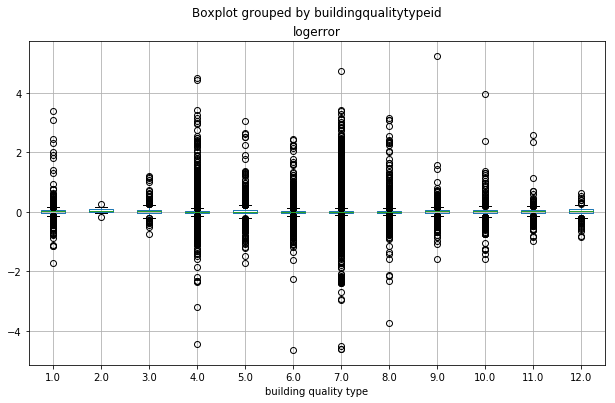

In [176]:
## Relationship between buildingqualitytypeid and logerror
merged_data1.boxplot(column = 'logerror', by = 'buildingqualitytypeid', figsize = (10,6))
plt.xlabel('building quality type')
plt.show()

It seems there is no apparent trend between buildingqualitytypeid and logerror

C:\TEXTBOOK\Python\anoconda\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

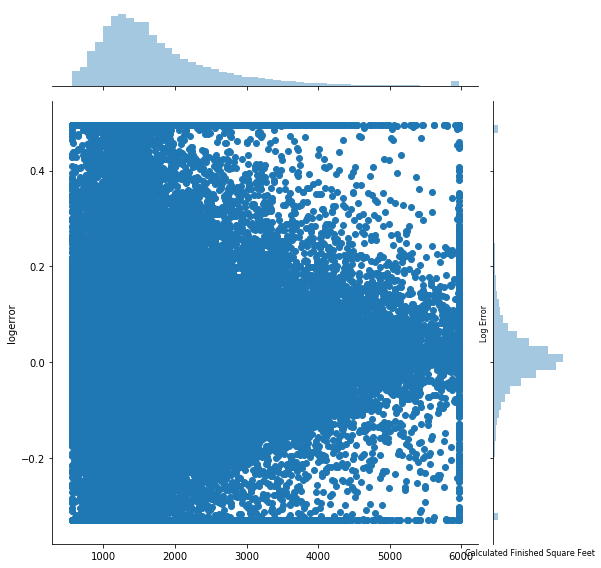

In [177]:
## Explore relationship between logerror and calculatedfinishedsquarefeet
cal = merged_data1.calculatedfinishedsquarefeet.values
ulimit = np.percentile(cal, 99.5)
llimit = np.percentile(cal, 0.5)
cal[cal > ulimit] = ulimit
cal[cal<llimit] = llimit

plt.figure(figsize=(8,8))
sns.jointplot(x = cal, y = log_error, size=8)
plt.ylabel('Log Error', fontsize=8)
plt.xlabel('Calculated Finished Square Feet', fontsize=8)
plt.show()

No pattern can be found

C:\TEXTBOOK\Python\anoconda\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

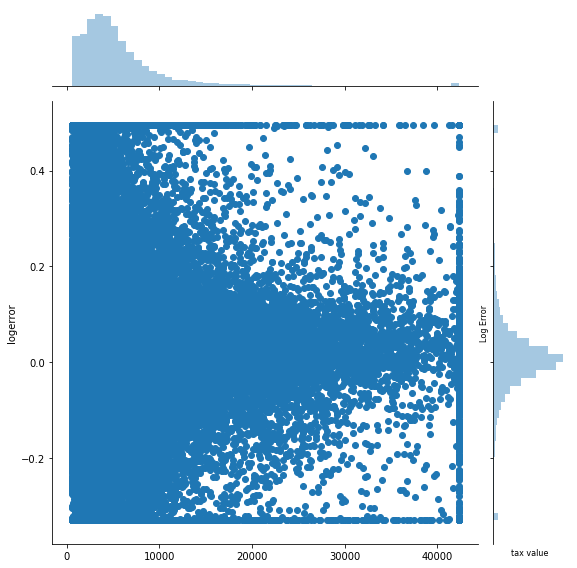

In [179]:
## Explore relationship between logerror and taxvaluedollarcnt
tax = merged_data1.taxamount.values
ulimit = np.percentile(tax, 99.5)
llimit = np.percentile(cal, 0.5)
tax[tax > ulimit] = ulimit
tax[tax<llimit] = llimit

plt.figure(figsize=(8,8))
sns.jointplot(x = tax, y = log_error, size=8)
plt.ylabel('Log Error', fontsize=8)
plt.xlabel('tax value', fontsize=8)
plt.show()

No pattern can be found

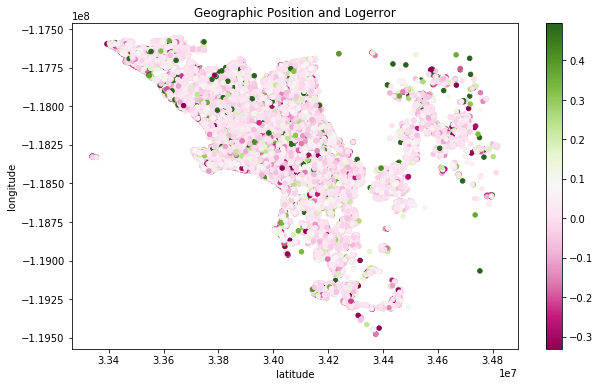

In [180]:
## Explore relationship between logerror and geographic position
merged_data1.plot(kind='scatter', x='latitude', y='longitude', figsize=(10, 6), c = log_error , cmap = 'PiYG')
plt.title('Geographic Position and Logerror')
plt.show()

From the graph above, there's no visible trend with respect to latitude or longitude. But for remote area, logerror is always large

#### One hot encoding

In [30]:
x_before = merged_data_2016[merged_data_2016.columns.difference(['logerror'])]
y = merged_data_2016['logerror'].values

In [31]:
x_before.shape

(90275, 59)

In [32]:
#merged_data.drop('poolsizesum', axis = 1, inplace=True)
x = preprocessing_data(x_before)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Number of missing value is : assessmentyear                  0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedfloor1squarefeet        0
finishedsquarefeet12            0
finishedsquarefeet15            0
finishedsquarefeet50            0
fips                            0
fireplacecnt                    0
fullbathcnt                     0
garagecarcnt                    0
garagetotalsqft                 0
hashottuborspa                  0
landtaxvaluedollarcnt           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
numberofstories                 0
poolcnt                         0
poolsizesum                     0
pooltypeid2                     0
pooltypeid7                     0
propertylandusetypeid           0
rawcensustractandblock          0
regioni

C:\TEXTBOOK\Python\anoconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\TEXTBOOK\Python\anoconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [232]:
# extract categorical variables
#merged_data1.drop('poolsizesum', axis = 1, inplace=True)
dummy_columns = merged_data1.select_dtypes(include=['category', 'object']).columns.values

In [233]:
# before dummy
print (merged_data1.shape)

# get dummies 
final_data = pd.get_dummies(merged_data1, columns = dummy_columns)

# after dummy
print (final_data.shape)

(167854, 37)
(167854, 89)


In [183]:
final_data.head()

,logerror,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet15,fireplacecnt,garagecarcnt,...,transaction_month_05,transaction_month_06,transaction_month_07,transaction_month_08,transaction_month_09,transaction_month_10,transaction_month_11,transaction_month_12,transaction_year_2016,transaction_year_2017
0,0.0276,2.0,3.0,4.0,1356.491895,1684.0,1684.0,2368.333485,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,-0.1684,3.5,4.0,7.0,1356.491895,2263.0,2263.0,2368.333485,0.0,2.0,...,0,0,0,0,0,0,0,0,1,0
2,-0.0040,3.0,2.0,4.0,1356.491895,2217.0,2217.0,2368.333485,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0218,2.0,2.0,4.0,1356.491895,839.0,839.0,2368.333485,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,-0.0050,2.5,4.0,7.0,1356.491895,2283.0,2283.0,2368.333485,0.0,2.0,...,0,0,0,0,0,0,0,0,1,0


#### Split train and test

In [186]:
from sklearn.model_selection import train_test_split 
x = final_data[final_data.columns.difference(['logerror'])]
y = final_data['logerror'].values
# Split data into train and test (80% & 20%)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42)

In [187]:
x.head()

,assessmentyear_2015.0,assessmentyear_2016.0,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedfloor1squarefeet,finishedsquarefeet12,finishedsquarefeet15,fips_6037.0,...,transaction_month_11,transaction_month_12,transaction_year_2016,transaction_year_2017,unitcnt_1.0,unitcnt_2.0,unitcnt_3.0,unitcnt_4.0,yardbuildingsqft17,yearbuilt
0,1,0,2.0,3.0,4.0,1684.0,1356.491895,1684.0,2368.333485,1,...,0,0,1,0,1,0,0,0,0.0,1959.0
1,1,0,3.5,4.0,7.0,2263.0,1356.491895,2263.0,2368.333485,0,...,0,0,1,0,1,0,0,0,0.0,2014.0
2,1,0,3.0,2.0,4.0,2217.0,1356.491895,2217.0,2368.333485,1,...,0,0,1,0,1,0,0,0,0.0,1940.0
3,1,0,2.0,2.0,4.0,839.0,1356.491895,839.0,2368.333485,1,...,0,0,1,0,1,0,0,0,0.0,1987.0
4,1,0,2.5,4.0,7.0,2283.0,1356.491895,2283.0,2368.333485,0,...,0,0,1,0,1,0,0,0,0.0,1981.0


#### Normalization

In [153]:
from sklearn.preprocessing import StandardScaler

# initialize a scaler object
scaler = StandardScaler()

# transform training set
x_train_std = scaler.fit_transform(x_train)

# the same transform for test set
x_test_std = scaler.transform(x_test)

C:\TEXTBOOK\Python\anoconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\TEXTBOOK\Python\anoconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\TEXTBOOK\Python\anoconda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


## Modeling

### Random forest

In [171]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rf_model = RandomForestRegressor(random_state = 10, min_samples_leaf = 5)

In [175]:
dic_rf = {'n_estimators':[800, 900, 1000, 1100, 1200]}
rf_cv = GridSearchCV(estimator = rf_model, param_grid = dic_rf, cv = 5, n_jobs = -1)
rf_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [800, 900, 1000, 1100, 1200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [177]:
rf_cv.best_params_

{'n_estimators': 900}

In [180]:
## Train model with best parameters
modle_rf_tuned = RandomForestRegressor(random_state = 10, n_estimators = 900, min_samples_leaf = 5, n_jobs = -1)
modle_rf_tuned.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

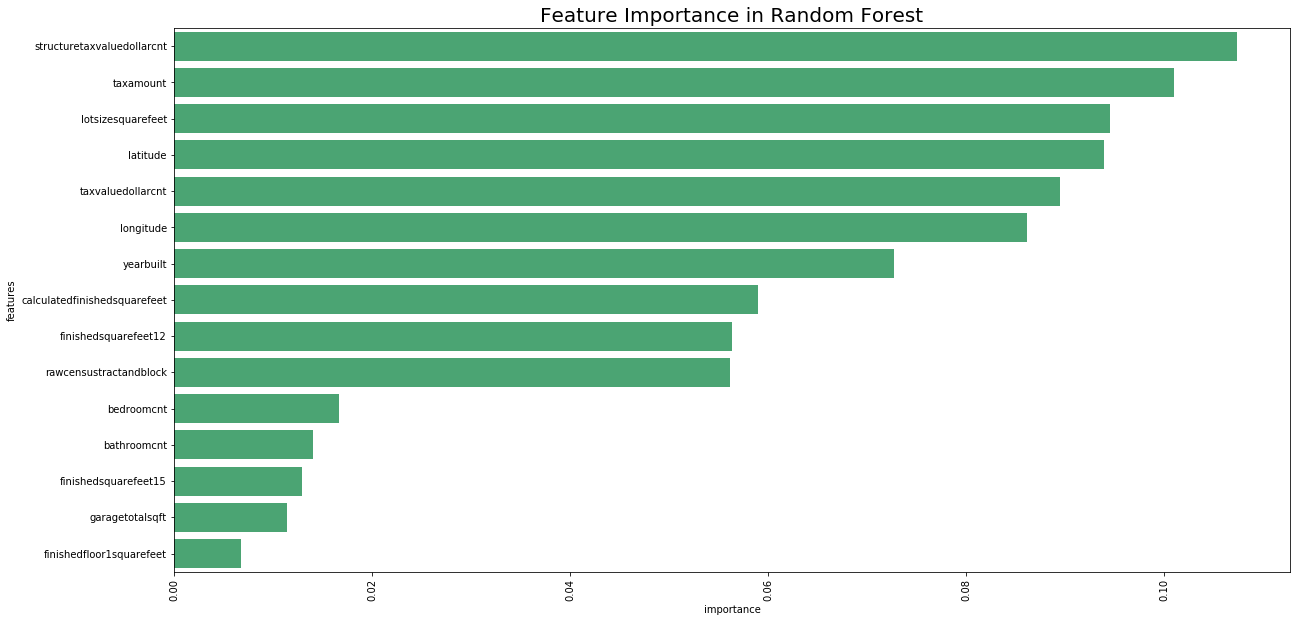

In [238]:
featureImportance = modle_rf_tuned.feature_importances_
features = pd.DataFrame()
features['features'] = x_train.columns.values
features['importance'] = featureImportance
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
sns.barplot(data=features.head(15),x="importance",y="features",ax=ax,orient="h", color = 'mediumseagreen')
plt.title("Feature Importance in Random Forest", fontsize=20)
plt.show()

In [181]:
from sklearn.metrics import mean_absolute_error
train_rf_predict = modle_rf_tuned.predict(x_train)
print("MAE for training data set is: ", mean_absolute_error(y_train, train_rf_predict))
test_rf_predict = modle_rf_tuned.predict(x_test)
print("MAE for test data set is: ", mean_absolute_error(y_test, test_rf_predict))

MAE for training data set is:  0.04672758292879747
MAE for test data set is:  0.06995870945401332


### GBDT

In [189]:
from sklearn.ensemble import GradientBoostingRegressor

In [188]:
gb_model.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=10, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)>

In [189]:
gb_model = GradientBoostingRegressor(random_state = 10)
params = {'learning_rate': np.arange(0.1,1,0.1), 'n_estimators': [200, 300, 400, 500, 600], 'max_depth': [2, 3, 4, 5]}
gb_sv = RandomizedSearchCV(estimator = gb_model, param_distributions = params, n_iter = 60, n_jobs = -1, cv = 5, random_state = 42)
gb_sv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=10, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=60, n_jobs=-1,
          param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'n_estimators': [200, 300, 400, 500, 600], 'max_depth': [2, 3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [191]:
gb_sv.best_params_

{'n_estimators': 400, 'max_depth': 2, 'learning_rate': 0.1}

In [192]:
## Train model with best parameters
gb_tuned = GradientBoostingRegressor(n_estimators = 400, max_depth = 2, learning_rate = 0.1, random_state = 10)
gb_tuned.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=10, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

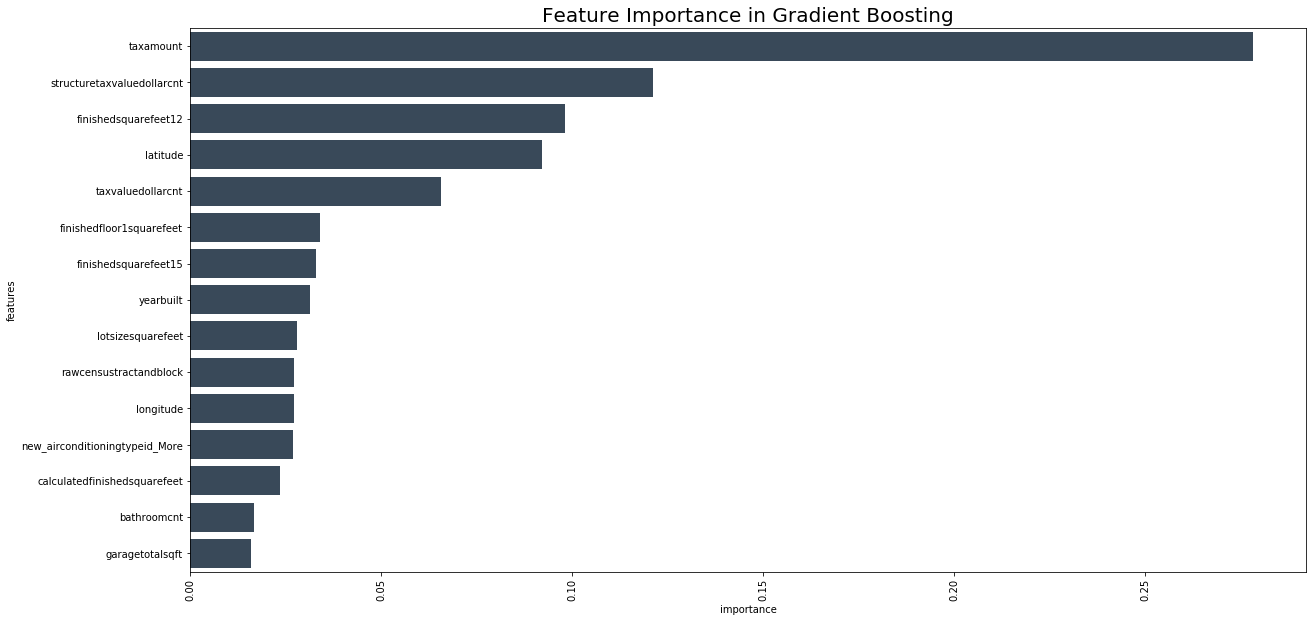

In [239]:
featureImportance = gb_tuned.feature_importances_
features = pd.DataFrame()
features['features'] = x_train.columns.values
features['importance'] = featureImportance
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
sns.barplot(data=features.head(15),x="importance",y="features",ax=ax,orient="h", color="#34495e")
plt.title("Feature Importance in Gradient Boosting", fontsize=20)
plt.show()

In [193]:
train_gb_predict = gb_tuned.predict(x_train)
print("MAE for training data set is: ", mean_absolute_error(y_train, train_gb_predict))
test_gb_predict = gb_tuned.predict(x_test)
print("MAE for test data set is: ", mean_absolute_error(y_test, test_gb_predict))

MAE for training data set is:  0.06735435218631244
MAE for test data set is:  0.06888352897932126


Text(0,0.5,'error')

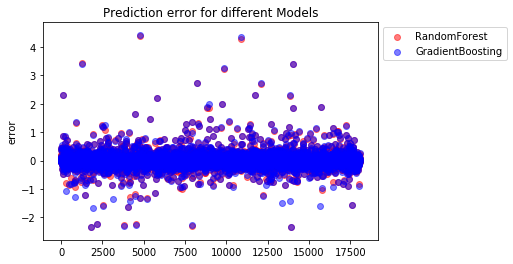

In [240]:
error_rf = y_test - test_rf_predict
error_gb = y_test - test_gb_predict
fig, ax = plt.subplots()
ax.scatter(x = np.arange(1,len(error_rf) + 1, 1), y = error_rf, c = 'red', alpha=0.5, label = 'RandomForest')
ax.scatter(x = np.arange(1,len(error_rf) + 1, 1), y = error_gb, c = 'blue', alpha=0.5, label = 'GradientBoosting')
ax.legend(bbox_to_anchor=(1.4, 1), bbox_transform=ax.transAxes)
plt.title("Prediction error for different Models")
plt.ylabel("error")

In [203]:
# transform training set
from sklearn.preprocessing import StandardScaler

# initialize a scaler object
scaler = StandardScaler()
x = scaler.fit_transform(x)

C:\TEXTBOOK\Python\anoconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\TEXTBOOK\Python\anoconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [219]:
x.shape

(167854, 89)

In [33]:
## Train model with best parameters
from sklearn.ensemble import GradientBoostingRegressor
gb_tuned = GradientBoostingRegressor(n_estimators = 400, max_depth = 2, learning_rate = 0.1, random_state = 10)
gb_tuned.fit(x, y)

ValueError: could not convert string to float: 'N'

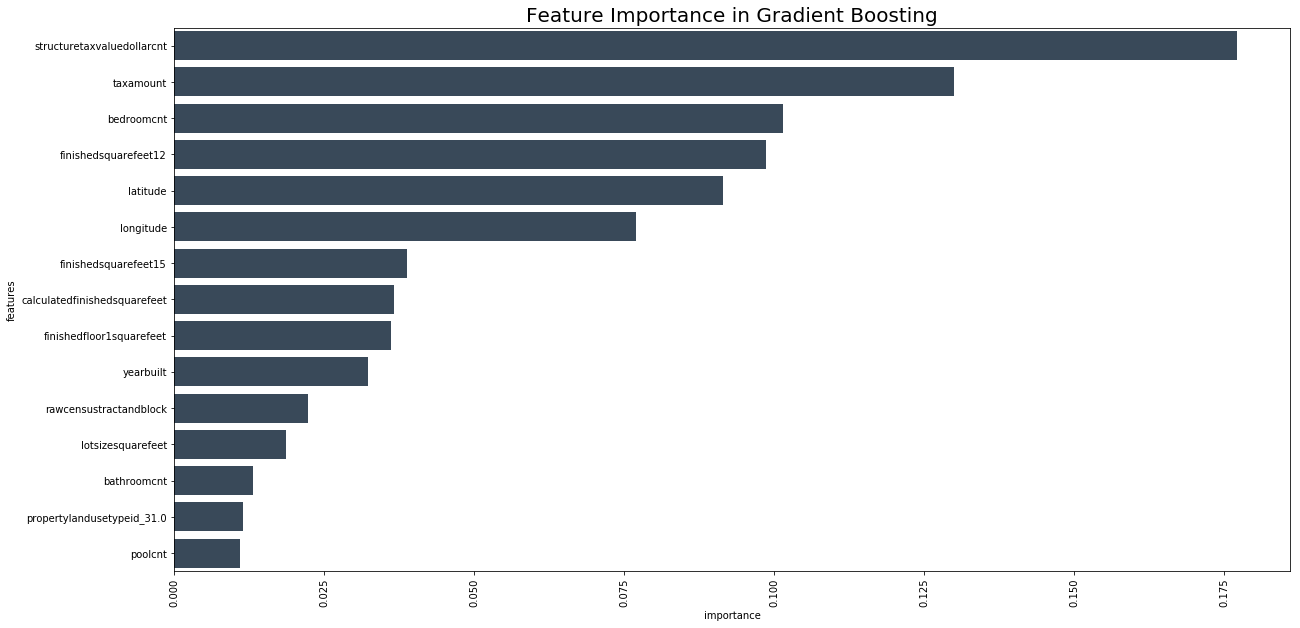

In [205]:
featureImportance = gb_tuned.feature_importances_
features = pd.DataFrame()
features['features'] = x_train.columns.values
features['importance'] = featureImportance
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
sns.barplot(data=features.head(15),x="importance",y="features",ax=ax,orient="h", color="#34495e")
plt.title("Feature Importance in Gradient Boosting", fontsize=20)
plt.show()

In [210]:
from sklearn.metrics import mean_absolute_error
train_gb_predict = gb_tuned.predict(x)
print("MAE for training data set is: ", mean_absolute_error(y, train_gb_predict))


MAE for training data set is:  0.06871000847995314


In [13]:
properties_to_predict = pd.read_csv('./zillow-prize-1/sample_submission.csv')

In [196]:
properties_to_predict.shape

(2985217, 7)

In [197]:
properties_to_predict.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


In [9]:
properties_total = properties_2016.append(properties_2017)

In [199]:
properties_total.shape

(5970434, 58)

In [200]:
properties_total.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [25]:
len(properties_total['parcelid'].unique())

2985217

In [21]:
properties_total_201610 = properties_total[properties_total['parcelid'].isin(list(properties_to_predict['ParcelId'].values))]
properties_total_201610['transactiondate'] = '2016-10-01'

In [23]:
properties_total_201610.shape

(5970434, 59)

In [216]:
properties_total_201610['poolsizesum'].isnull().sum()/5970434

0.9906341817027037

In [29]:
def preprocessing_data(merged_data):
    missing_df = merged_data.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df['missing_percentage'] = missing_df['missing_count']/merged_data.shape[0]
    missing_df = missing_df[missing_df['missing_count'] >= 0]
    missing_df = missing_df.sort_values(by = 'missing_percentage')
    #most_missing_columns = missing_df[missing_df['missing_percentage'] >= 0.99]
    merged_data1 = merged_data.drop(['pooltypeid10', 'decktypeid', 'finishedsquarefeet6', 'typeconstructiontypeid', 'architecturalstyletypeid','fireplaceflag', 'yardbuildingsqft26', 'storytypeid','basementsqft', 'finishedsquarefeet13', 'buildingclasstypeid'], axis = 1)
    #many_missing_columns = missing_df[(missing_df['missing_percentage'] >= 0.4) & (missing_df['missing_percentage'] < 0.99)]
    #miss_40_99_data = merged_data1[many_missing_columns.column_name.values]
    #miss_40_99_data = miss_40_99_data.reindex(sorted(miss_40_99_data.columns), axis=1)
    merged_data1['airconditioningtypeid'].fillna(value = 0, inplace = True)
    merged_data1['new_airconditioningtypeid'] = pd.cut(merged_data1['airconditioningtypeid'],bins=[0,1,2, max(merged_data1['airconditioningtypeid']) + 1], right = False, include_lowest = True,labels=['None', 'Normal', 'More'])
    merged_data1 = merged_data1.drop('airconditioningtypeid', axis = 1)
    merged_data1['new_airconditioningtypeid'] = merged_data1['new_airconditioningtypeid'].astype('category')
    merged_data1 = merged_data1.drop('regionidneighborhood', axis = 1)
    features = ['finishedfloor1squarefeet', 'finishedsquarefeet15', 'finishedsquarefeet50']
    for f in features:
        merged_data1[f].fillna(value = merged_data1[f].mean(), inplace = True)
        print (merged_data1[f].isnull().sum())
    features = ['fireplacecnt', 'garagecarcnt', 'garagetotalsqft']
    for f in features:
        merged_data1[f].fillna(value = 0, inplace = True)
        print (merged_data1[f].isnull().sum())
    merged_data1['hashottuborspa'].fillna(value = 0, inplace = True)
    merged_data1['hashottuborspa'] = merged_data1['hashottuborspa'].astype('category')
    merged_data1['numberofstories'].fillna(value = 0, inplace = True)
    features = ['poolcnt','poolsizesum', 'pooltypeid2', 'pooltypeid7']
    for f in features:
        merged_data1[f].fillna(value = 0, inplace = True)
        print (merged_data1[f].isnull().sum())
    merged_data1['taxdelinquencyyear'].fillna(value = 0, inplace = True)
    merged_data1['taxdelinquencyyear'].apply(lambda x: 15 if x > 15 else x)
    merged_data1['taxdelinquencyflag'].fillna(value = 'N', inplace = True)
    features = ['threequarterbathnbr', 'yardbuildingsqft17']
    for f in features:
        merged_data1[f].fillna(value = 0, inplace = True)
        print (merged_data1[f].isnull().sum())
    few_missing_columns = missing_df[(missing_df['missing_percentage'] >= 0.05) & (missing_df['missing_percentage'] < 0.4)]
    #miss_40_99_data = merged_data1[few_missing_columns.column_name.values]
    merged_data1 = merged_data1.drop('propertyzoningdesc', axis = 1)
    features = ['finishedsquarefeet12', 'lotsizesquarefeet']
    for f in features:
        merged_data1[f].fillna(value = 0, inplace = True)
        print (merged_data1[f].isnull().sum())
    merged_data1['unitcnt'].fillna(value = merged_data1['unitcnt'].mode().values[0], inplace = True)
    merged_data1['unitcnt'] = merged_data1['unitcnt'].apply(lambda x: 4 if x > 4 else x)
    merged_data1['unitcnt'] = merged_data1['unitcnt'].astype('category')
    merged_data1['buildingqualitytypeid'].fillna(value = merged_data1['buildingqualitytypeid'].mode().values[0], inplace = True)
    merged_data1['heatingorsystemtypeid'].fillna(value = 0, inplace = True)
    merged_data1['new_heatingorsystemtypeid'] = pd.cut(merged_data1['heatingorsystemtypeid'],bins=[0,1,3 ,7, max(merged_data1['heatingorsystemtypeid']) + 1], right = False, include_lowest = True,labels=['None', 'Normal', 'Excellenct', 'extreme'])
    merged_data1['new_heatingorsystemtypeid'] = merged_data1['new_heatingorsystemtypeid'].astype('category')
    merged_data1 = merged_data1.drop('heatingorsystemtypeid', axis = 1)
    #missing_0_5_columns = missing_df[(missing_df['missing_percentage'] < 0.05) & (missing_df['missing_percentage'] > 0)]
    #miss_0_5_data = merged_data1[missing_0_5_columns.column_name.values]
    #miss_0_5_data = miss_0_5_data.reindex(sorted(miss_0_5_data.columns), axis=1)
    merged_data1['regionidzip'].fillna(value = merged_data1['regionidzip'].mode().values[0], inplace = True)
    merged_data1['regionidzip'] = merged_data1['regionidzip'].astype('str')
    merged_data1['regionidzip'] = merged_data1['regionidzip'].apply(lambda x: x[:3])
    merged_data1['regionidzip'] = merged_data1['regionidzip'].astype('category')
    merged_data1 = merged_data1.drop('regionidcity', axis = 1)
    merged_data1 = merged_data1.drop('propertycountylandusecode', axis = 1)
    features = ['taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'structuretaxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'calculatedfinishedsquarefeet','yearbuilt']
    for f in features:
        merged_data1[f].fillna(value = merged_data1[f].median(), inplace = True)
        print (merged_data1[f].isnull().sum())
    features = ['fullbathcnt', 'calculatedbathnbr']
    for f in features:
        merged_data1[f].fillna(value = 0, inplace = True)
        print (merged_data1[f].isnull().sum())
    merged_data1 = merged_data1.drop('censustractandblock', axis = 1)
    merged_data1.dropna(inplace = True)
    merged_data1['propertylandusetypeid'] = merged_data1['propertylandusetypeid'].astype('category')
    merged_data1['regionidcounty'] = merged_data1['regionidcounty'].astype('category')
    merged_data1['assessmentyear'] = merged_data1['assessmentyear'].astype('category')
    merged_data1['fips'] = merged_data1['fips'].astype('category')
    merged_data1['transactiondate'] = merged_data1['transactiondate'].astype('str')
    merged_data1['transaction_month'] = merged_data1['transactiondate'].apply(lambda x: x[5:7]).astype('category')
    merged_data1['transaction_year'] = merged_data1['transactiondate'].apply(lambda x: x[0:4]).astype('category')
    merged_data1.drop('transactiondate', axis = 1, inplace = True)
    merged_data1.drop('parcelid', axis = 1, inplace = True)
    print('Number of missing value is :', merged_data1.isnull().sum())
    merged_data1.drop(['calculatedbathnbr', 'fullbathcnt', 'finishedsquarefeet50', 'pooltypeid7', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt'], axis = 1, inplace = True)
    dummy_columns = merged_data1.select_dtypes(include=['category', 'object']).columns.values
    # before dummy
    print (merged_data1.shape)
    # get dummies 
    final_data = pd.get_dummies(merged_data1, columns = dummy_columns)

    # after dummy
    print (final_data.shape)
    from sklearn.preprocessing import StandardScaler
    # initialize a scaler object
    scaler = StandardScaler()
    # transform training set
    final_data = scaler.fit_transform(final_data)
    
    return merged_data1
    
    